<a href="https://colab.research.google.com/github/kajoot/Titanic-Machine-Learning-from-Disaster/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading data

In [ ]:
data = pd.read_csv("/content/train.csv")
test = pd.read_csv("test.csv")

# EDA

In [ ]:
data.drop_duplicates(inplace= True)
test.drop_duplicates(inplace= True)

In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***Label*** : Survived \
***Usefull*** ***features*** : Pclass , Sex , Age , SibSp , Parch , Ticket , Fare , Cabin , Embarked \
***Useless*** ***features*** : PassengerId, Name , Ticket 

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
(data.isnull().sum()*100/891).round()

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

we need to drop the cabin ( 77% of the data is missing )

# Data Cleaning 

In [ ]:
Submission = pd.DataFrame({'PassengerId':test["PassengerId"]})

We will drop Cabin, Name, Tickets, Embarked and PassengerId 

In [ ]:
data.drop(columns=["Cabin","Name","Ticket","PassengerId","Embarked"], inplace = True )
test.drop(columns=["Cabin","Name","Ticket","PassengerId","Embarked"], inplace = True )
test = test.fillna(data.median())
data.dropna(axis='index',inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


## Sex

In [ ]:
data.Sex.value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [ ]:
gender = pd.get_dummies(data['Sex'])
data = data.join(gender).drop('Sex', axis=1)
gender = pd.get_dummies(test['Sex'])
test = test.join(gender).drop('Sex', axis=1)

In [ ]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
889,1,1,26.0,0,0,30.0000,0,1


## Age

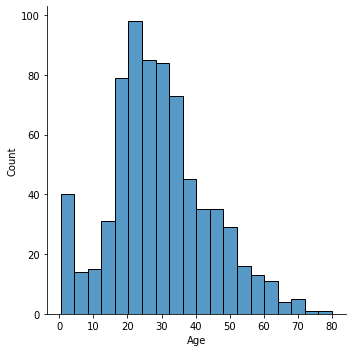

In [ ]:
sns.displot(data.Age)

In [ ]:
data.Age.describe().round()

count    714.0
mean      30.0
std       15.0
min        0.0
25%       20.0
50%       28.0
75%       38.0
max       80.0
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


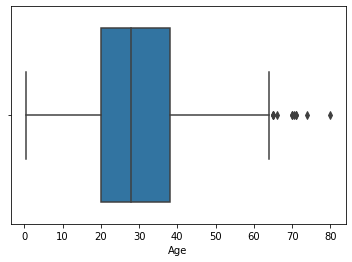

In [ ]:
sns.boxplot(data.Age)

In [ ]:
age = sorted(data.Age)
q1 = np.nanpercentile(age, 25)
q3 = np.nanpercentile(age, 75)
IQR = q3-q1
upr_bound = q3+(1.5*IQR)
data.loc[(data['Age'] > upr_bound),'Age'] = upr_bound
age = sorted(test.Age)
q1 = np.nanpercentile(age, 25)
q3 = np.nanpercentile(age, 75)
IQR = q3-q1
upr_bound = q3+(1.5*IQR)
test.loc[(test['Age'] > upr_bound),'Age'] = upr_bound

In [ ]:
data.Age.describe().round()

count    714.0
mean      30.0
std       14.0
min        0.0
25%       20.0
50%       28.0
75%       38.0
max       65.0
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


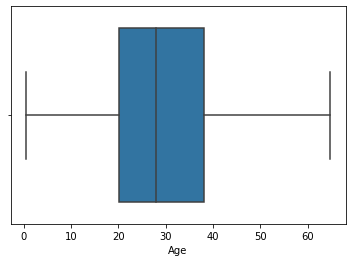

In [ ]:
sns.boxplot(data.Age)

In [ ]:
data['Age Group'] = pd.cut(data['Age'], bins=[0,2,17,31,45,60], labels=["Baby", "child", "young adult","Middle-aged adult","older Adult"])
group = pd.get_dummies(data['Age Group'])
data = data.join(group).drop('Age Group', axis=1)
test['Age Group'] = pd.cut(test['Age'], bins=[0,2,17,31,45,60], labels=["Baby", "child", "young adult","Middle-aged adult","older Adult"])
group = pd.get_dummies(test['Age Group'])
test = test.join(group).drop('Age Group', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           714 non-null    int64  
 1   Pclass             714 non-null    int64  
 2   Age                714 non-null    float64
 3   SibSp              714 non-null    int64  
 4   Parch              714 non-null    int64  
 5   Fare               714 non-null    float64
 6   female             714 non-null    uint8  
 7   male               714 non-null    uint8  
 8   Baby               714 non-null    uint8  
 9   child              714 non-null    uint8  
 10  young adult        714 non-null    uint8  
 11  Middle-aged adult  714 non-null    uint8  
 12  older Adult        714 non-null    uint8  
dtypes: float64(2), int64(4), uint8(7)
memory usage: 60.1 KB


## Pclass

In [ ]:
data.Pclass.value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [ ]:
data['Pclass'] = pd.cut(data['Pclass'], bins=[0,1,2,3], labels=["First class", "Second Class", "Third Class"])
classes = pd.get_dummies(data['Pclass'])
data = data.join(classes).drop('Pclass', axis=1)
test['Pclass'] = pd.cut(test['Pclass'], bins=[0,1,2,3], labels=["First class", "Second Class", "Third Class"])
classes = pd.get_dummies(test['Pclass'])
test = test.join(classes).drop('Pclass', axis=1)
data

,Survived,Age,SibSp,Parch,Fare,female,male,Baby,child,young adult,Middle-aged adult,older Adult,First class,Second Class,Third Class
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1,0,0,0,0,1,0,0,0,1
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,0,1,0,0,1,0,0
889,1,26.0,0,0,30.0000,0,1,0,0,1,0,0,1,0,0


## Fare

In [ ]:
data.Fare.describe()

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64

512 \
bro you got ripped into riding a sinking ship 😆

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


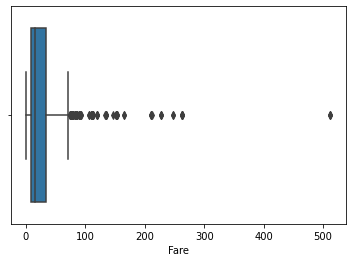

In [ ]:
sns.boxplot(data.Fare)

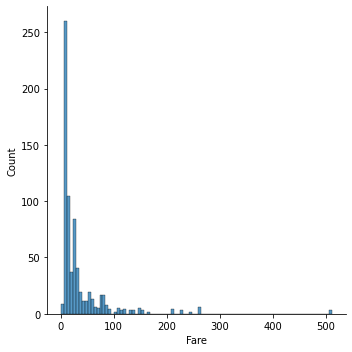

In [ ]:
sns.displot(data.Fare)

In [ ]:
data = data[data['Fare'] < 500 ]
data['Fare'] = (data['Fare']+1).transform(np.log)
test['Fare'] = (test['Fare']+1).transform(np.log)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Age,SibSp,Parch,Fare,female,male,Baby,child,young adult,Middle-aged adult,older Adult,First class,Second Class,Third Class
0,0,22.0,1,0,2.110213,0,1,0,0,1,0,0,0,0,1
1,1,38.0,1,0,4.280593,1,0,0,0,0,1,0,1,0,0
2,1,26.0,0,0,2.188856,1,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,3.990834,1,0,0,0,0,1,0,1,0,0
4,0,35.0,0,0,2.202765,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,3.405355,1,0,0,0,0,1,0,0,0,1
886,0,27.0,0,0,2.639057,0,1,0,0,1,0,0,0,1,0
887,1,19.0,0,0,3.433987,1,0,0,0,1,0,0,1,0,0
889,1,26.0,0,0,3.433987,0,1,0,0,1,0,0,1,0,0


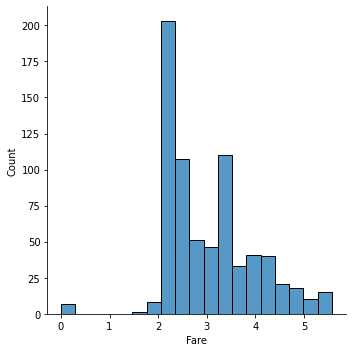

In [ ]:
sns.displot(data['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


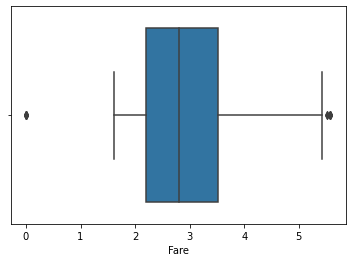

In [ ]:
sns.boxplot(data.Fare)

In [ ]:
tf = sorted(data.Fare)
q1 = np.percentile(tf, 25)
q3 = np.percentile(tf, 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
data.loc[(data['Fare'] > upr_bound),'Fare'] = upr_bound
data.loc[(data['Fare'] < lwr_bound),'Fare'] = lwr_bound
tf = sorted(test.Fare)
q1 = np.percentile(tf, 25)
q3 = np.percentile(tf, 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
test.loc[(test['Fare'] > upr_bound),'Fare'] = upr_bound
test.loc[(test['Fare'] < lwr_bound),'Fare'] = lwr_bound

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


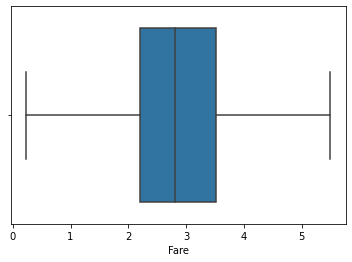

In [ ]:
sns.boxplot(data.Fare)

## SibSp and Parch

In [ ]:
data.SibSp.value_counts()

0    468
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

In [ ]:
data.Parch.value_counts()

0    519
1    109
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
NotAlone1 =  data['Parch'].apply(lambda x: 1  if (x != 0 ) else 0 )
NotAlone2 =  data['SibSp'].apply(lambda x: 1  if (x != 0 ) else 0 )
NotAlone= NotAlone1 | NotAlone2
NotAlone = NotAlone.astype('uint8')
data = data.join(NotAlone.rename('NotAlone'))
data.drop(columns=['Parch','SibSp'],inplace=True)
NotAlone1 =  test['Parch'].apply(lambda x: 1  if (x != 0 ) else 0 )
NotAlone2 =  test['SibSp'].apply(lambda x: 1  if (x != 0 ) else 0 )
NotAlone= NotAlone1 | NotAlone2
NotAlone = NotAlone.astype('uint8')
test = test.join(NotAlone.rename('NotAlone'))
test.drop(columns=['Parch','SibSp'],inplace=True)
data

,Survived,Age,Fare,female,male,Baby,child,young adult,Middle-aged adult,older Adult,First class,Second Class,Third Class,NotAlone
0,0,22.0,2.110213,0,1,0,0,1,0,0,0,0,1,1
1,1,38.0,4.280593,1,0,0,0,0,1,0,1,0,0,1
2,1,26.0,2.188856,1,0,0,0,1,0,0,0,0,1,0
3,1,35.0,3.990834,1,0,0,0,0,1,0,1,0,0,1
4,0,35.0,2.202765,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,3.405355,1,0,0,0,0,1,0,0,0,1,1
886,0,27.0,2.639057,0,1,0,0,1,0,0,0,1,0,0
887,1,19.0,3.433987,1,0,0,0,1,0,0,1,0,0,0
889,1,26.0,3.433987,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())
data['Fare'] = (data['Fare'] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())
test['Age'] = (test['Age'] - test['Age'].min()) / (test['Age'].max() - test['Age'].min())
test['Fare'] = (test['Fare'] - test['Fare'].min()) / (test['Fare'].max() - test['Fare'].min())
data

,Survived,Age,Fare,female,male,Baby,child,young adult,Middle-aged adult,older Adult,First class,Second Class,Third Class,NotAlone
0,0,0.335132,0.357421,0,1,0,0,1,0,0,0,0,1,1
1,1,0.583608,0.769668,1,0,0,0,0,1,0,1,0,0,1
2,1,0.397251,0.372358,1,0,0,0,1,0,0,0,0,1,0
3,1,0.537019,0.714630,1,0,0,0,0,1,0,1,0,0,1
4,0,0.537019,0.375000,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0.599138,0.603423,1,0,0,0,0,1,0,0,0,1,1
886,0,0.412781,0.457870,0,1,0,0,1,0,0,0,1,0,0
887,1,0.288543,0.608861,1,0,0,0,1,0,0,1,0,0,0
889,1,0.397251,0.608861,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           711 non-null    int64  
 1   Age                711 non-null    float64
 2   Fare               711 non-null    float64
 3   female             711 non-null    uint8  
 4   male               711 non-null    uint8  
 5   Baby               711 non-null    uint8  
 6   child              711 non-null    uint8  
 7   young adult        711 non-null    uint8  
 8   Middle-aged adult  711 non-null    uint8  
 9   older Adult        711 non-null    uint8  
 10  First class        711 non-null    uint8  
 11  Second Class       711 non-null    uint8  
 12  Third Class        711 non-null    uint8  
 13  NotAlone           711 non-null    uint8  
dtypes: float64(2), int64(1), uint8(11)
memory usage: 46.0 KB


# Model

In [ ]:
X=data.drop(columns='Survived',axis=1)
y=data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
pipeline = []
pipeline.append(LogisticRegression(solver='liblinear'))
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())
pipeline.append(RandomForestClassifier())

In [ ]:
models = ["Logistic Regression","SVM","KNN","Decision Tree","Random Forest"]
acc = []
auc = []
cm = []

for model in pipeline:
	model.fit(X_train,y_train)
	y_pred = model.predict(X_test)
	acc.append(metrics.accuracy_score(y_test,y_pred))
	fpr , tpr , _thresholds = metrics.roc_curve(y_test,y_pred)
	auc.append(round(metrics.auc(fpr,tpr),2))
	cm.append(confusion_matrix(y_test,y_pred))

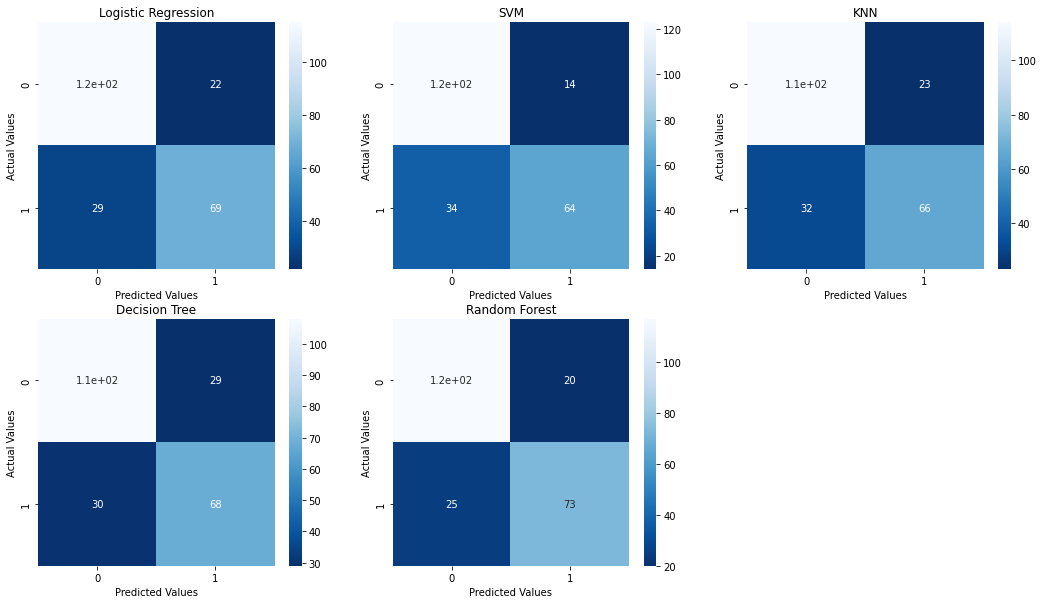

In [ ]:
fig = plt.figure(figsize =(18,10))
for i in range(len(cm)) :
	c=cm[i]
	model = models[i]
	sub= fig.add_subplot(2,3,i+1).set_title(model)
	c_plot = sns.heatmap(c,annot=True,cmap='Blues_r')
	c_plot.set_xlabel('Predicted Values')
	c_plot.set_ylabel('Actual Values')

In [ ]:
Result = pd.DataFrame({'Model':models,'Accuracy':acc,'AUC':auc})
Result

,Model,Accuracy,AUC
0,Logistic Regression,0.782979,0.77
1,SVM,0.795745,0.78
2,KNN,0.765957,0.75
3,Decision Tree,0.748936,0.74
4,Random Forest,0.808511,0.80


In [ ]:
RF = RandomForestClassifier()
RF.fit(X,y)
RFP = pd.Series(RF.predict(test)).rename('Survived')
Submission = Submission.join(RFP)
Submission.to_csv("Submission.csv",index=False)